In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [18]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [4]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=train_images[0].shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model = baseline_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(test_images, test_labels))


Epoch 1/30
782/782 [==============================] - 200s 251ms/step - loss: 1.5143 - accuracy: 0.4438 - val_loss: 1.1540 - val_accuracy: 0.5913
Epoch 2/30
782/782 [==============================] - 247s 316ms/step - loss: 0.9978 - accuracy: 0.6457 - val_loss: 0.9186 - val_accuracy: 0.6763
Epoch 3/30
782/782 [==============================] - 221s 282ms/step - loss: 0.7888 - accuracy: 0.7218 - val_loss: 0.7487 - val_accuracy: 0.7394
Epoch 4/30
782/782 [==============================] - 200s 256ms/step - loss: 0.6432 - accuracy: 0.7746 - val_loss: 0.7019 - val_accuracy: 0.7581
Epoch 5/30
782/782 [==============================] - 194s 249ms/step - loss: 0.5376 - accuracy: 0.8114 - val_loss: 0.7241 - val_accuracy: 0.7555
Epoch 6/30
782/782 [==============================] - 202s 258ms/step - loss: 0.4530 - accuracy: 0.8403 - val_loss: 0.7254 - val_accuracy: 0.7611
Epoch 7/30
782/782 [==============================] - 192s 245ms/step - loss: 0.3706 - accuracy: 0.8687 - val_loss: 0.7113 -

In [9]:
scores = model.evaluate(test_images, test_labels, verbose=1)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

313/313 [==============================] - 11s 35ms/step - loss: 1.4519 - accuracy: 0.7661
Test Loss: 1.4519354104995728
Test Accuracy: 0.7660999894142151


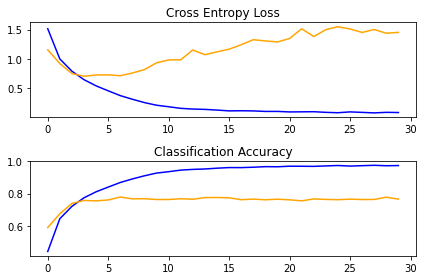

In [10]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.tight_layout()
plt.show()


In [11]:
model.save('cifar10_model.h5')

313/313 [==============================] - 13s 40ms/step


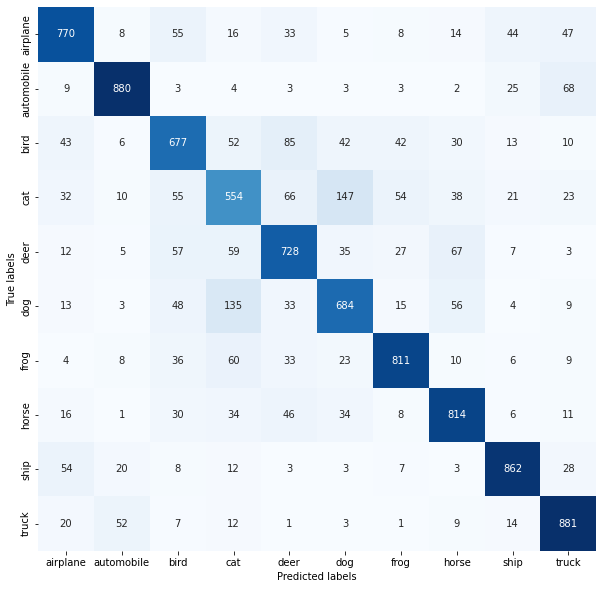

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(np.argmax(test_labels, axis=1), predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


313/313 [==============================] - 12s 39ms/step


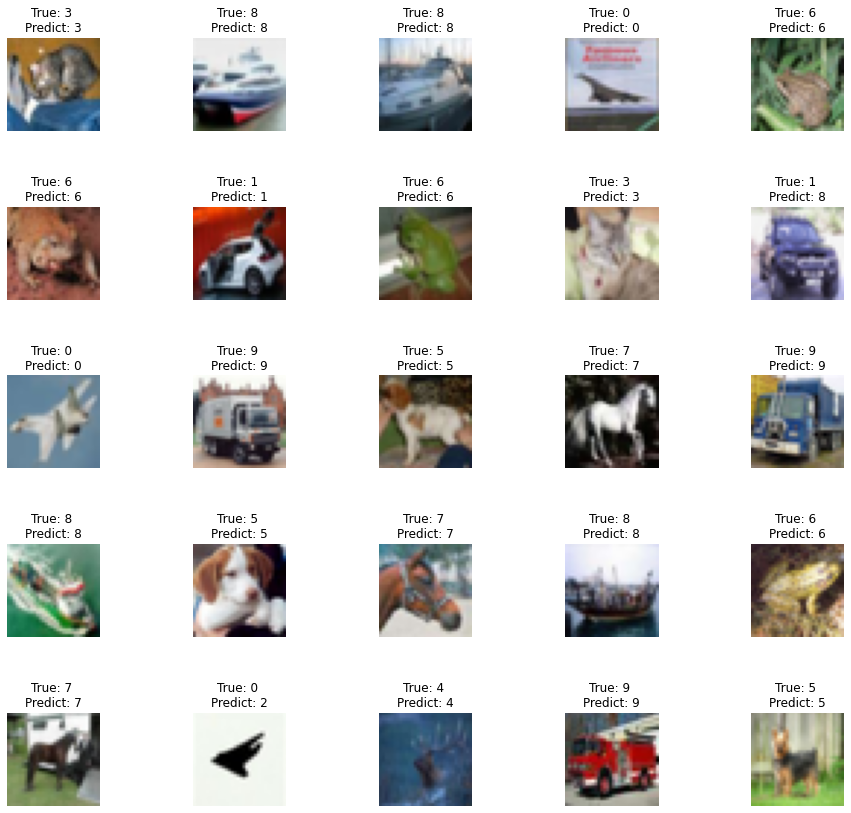

IndexError: index 32 is out of bounds for axis 0 with size 32

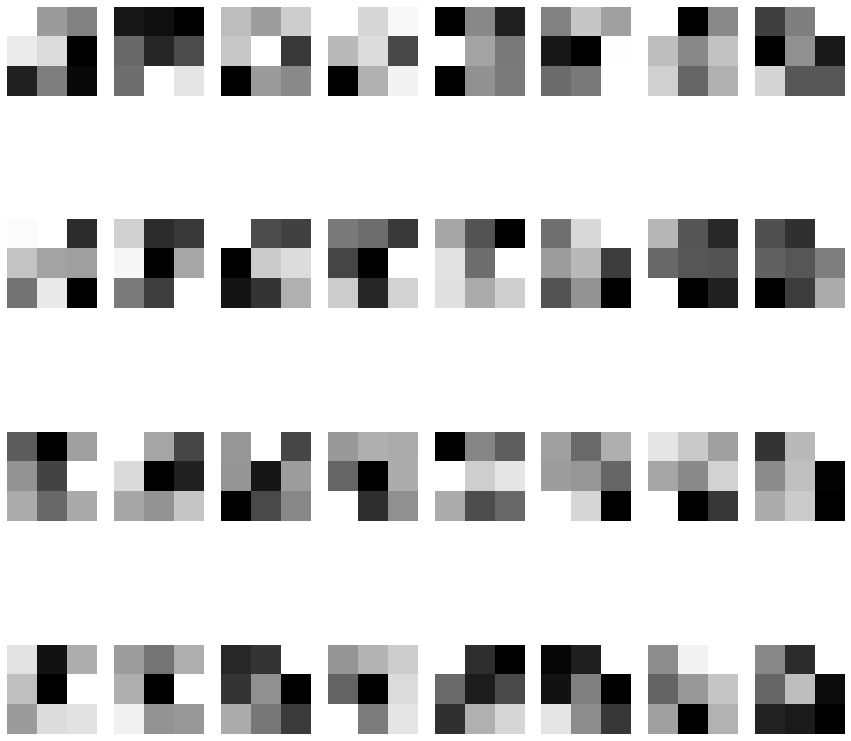

In [16]:
# Plot a random sample of test images with their predicted labels
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (y_true[i], y_pred_classes[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

# Plot the filters for the first convolutional layer
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

fig, axes = plt.subplots(4, 8, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 32):
    f = filters[:, :, :, i]
    for j in np.arange(0, 3):
        axes[8*j+i].imshow(f[:, :, j], cmap='gray')
        axes[8*j+i].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

1/1 [==============================] - 0s 352ms/step


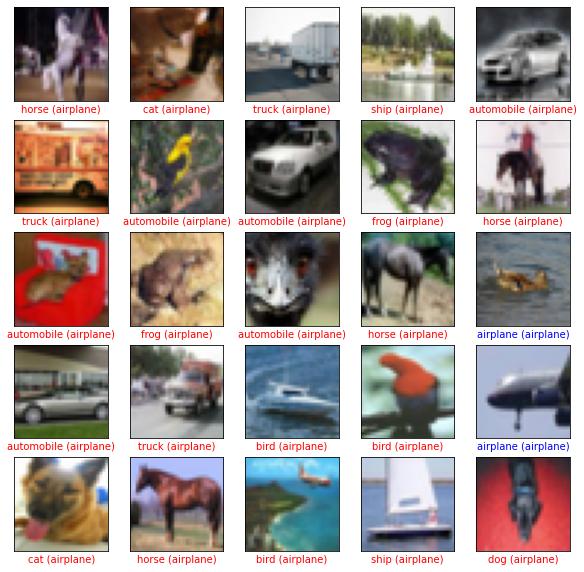

In [19]:
# Plot random images from the test set
num_rows, num_cols = 5, 5
num_images = num_rows*num_cols
random_indices = np.random.choice(range(len(test_images)), num_images, replace=False)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(random_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(random_labels[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.show()